In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize


/var/folders/vs/zcjd1wds7_78_tmdl741y03m0000gn/T/ipykernel_4063/145987161.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load Boston House Pricing dataset
data = pd.read_csv("boston (1).csv")

In [3]:
# Initial inspection of the dataset
# View the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# View the last few rows
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
# View the whole data to get an overview of the dataset
print(data.to_string())

         CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0     0.00632   18.0   2.31     0  0.5380  6.575   65.2   4.0900    1  296.0     15.3  396.90   4.98  24.0
1     0.02731    0.0   7.07     0  0.4690  6.421   78.9   4.9671    2  242.0     17.8  396.90   9.14  21.6
2     0.02729    0.0   7.07     0  0.4690  7.185   61.1   4.9671    2  242.0     17.8  392.83   4.03  34.7
3     0.03237    0.0   2.18     0  0.4580  6.998   45.8   6.0622    3  222.0     18.7  394.63   2.94  33.4
4     0.06905    0.0   2.18     0  0.4580  7.147   54.2   6.0622    3  222.0     18.7  396.90   5.33  36.2
5     0.02985    0.0   2.18     0  0.4580  6.430   58.7   6.0622    3  222.0     18.7  394.12   5.21  28.7
6     0.08829   12.5   7.87     0  0.5240  6.012   66.6   5.5605    5  311.0     15.2  395.60  12.43  22.9
7     0.14455   12.5   7.87     0  0.5240  6.172   96.1   5.9505    5  311.0     15.2  396.90  19.15  27.1
8     0.21124   12.5   7.87     0  0.

In [6]:
# Sort the data according to MEDV
sortedData = data.sort_values(['MEDV'], ascending=[False])

In [7]:
# View the sorted data to see patterns between the input features and MEDV
print(sortedData.to_string())

         CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
283   0.01501   90.0   1.21     1  0.4010  7.923   24.8   5.8850    1  198.0     13.6  395.52   3.16  50.0
225   0.52693    0.0   6.20     0  0.5040  8.725   83.0   2.8944    8  307.0     17.4  382.00   4.63  50.0
369   5.66998    0.0  18.10     1  0.6310  6.683   96.8   1.3567   24  666.0     20.2  375.33   3.73  50.0
370   6.53876    0.0  18.10     1  0.6310  7.016   97.5   1.2024   24  666.0     20.2  392.05   2.96  50.0
371   9.23230    0.0  18.10     0  0.6310  6.216  100.0   1.1691   24  666.0     20.2  366.15   9.53  50.0
372   8.26725    0.0  18.10     1  0.6680  5.875   89.6   1.1296   24  666.0     20.2  347.88   8.88  50.0
186   0.05602    0.0   2.46     0  0.4880  7.831   53.6   3.1992    3  193.0     17.8  392.63   4.45  50.0
204   0.02009   95.0   2.68     0  0.4161  8.034   31.9   5.1180    4  224.0     14.7  390.55   2.88  50.0
257   0.61154   20.0   3.97     0  0.

In [8]:
# Perform Exploratory Data Analysis
# Check the basic statistics of each attributes (especially the Standard Deviation)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Selected 6 features based on Standard Deviation analysis for further analysis
initialFeatures = data[['CRIM', 'INDUS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV']]

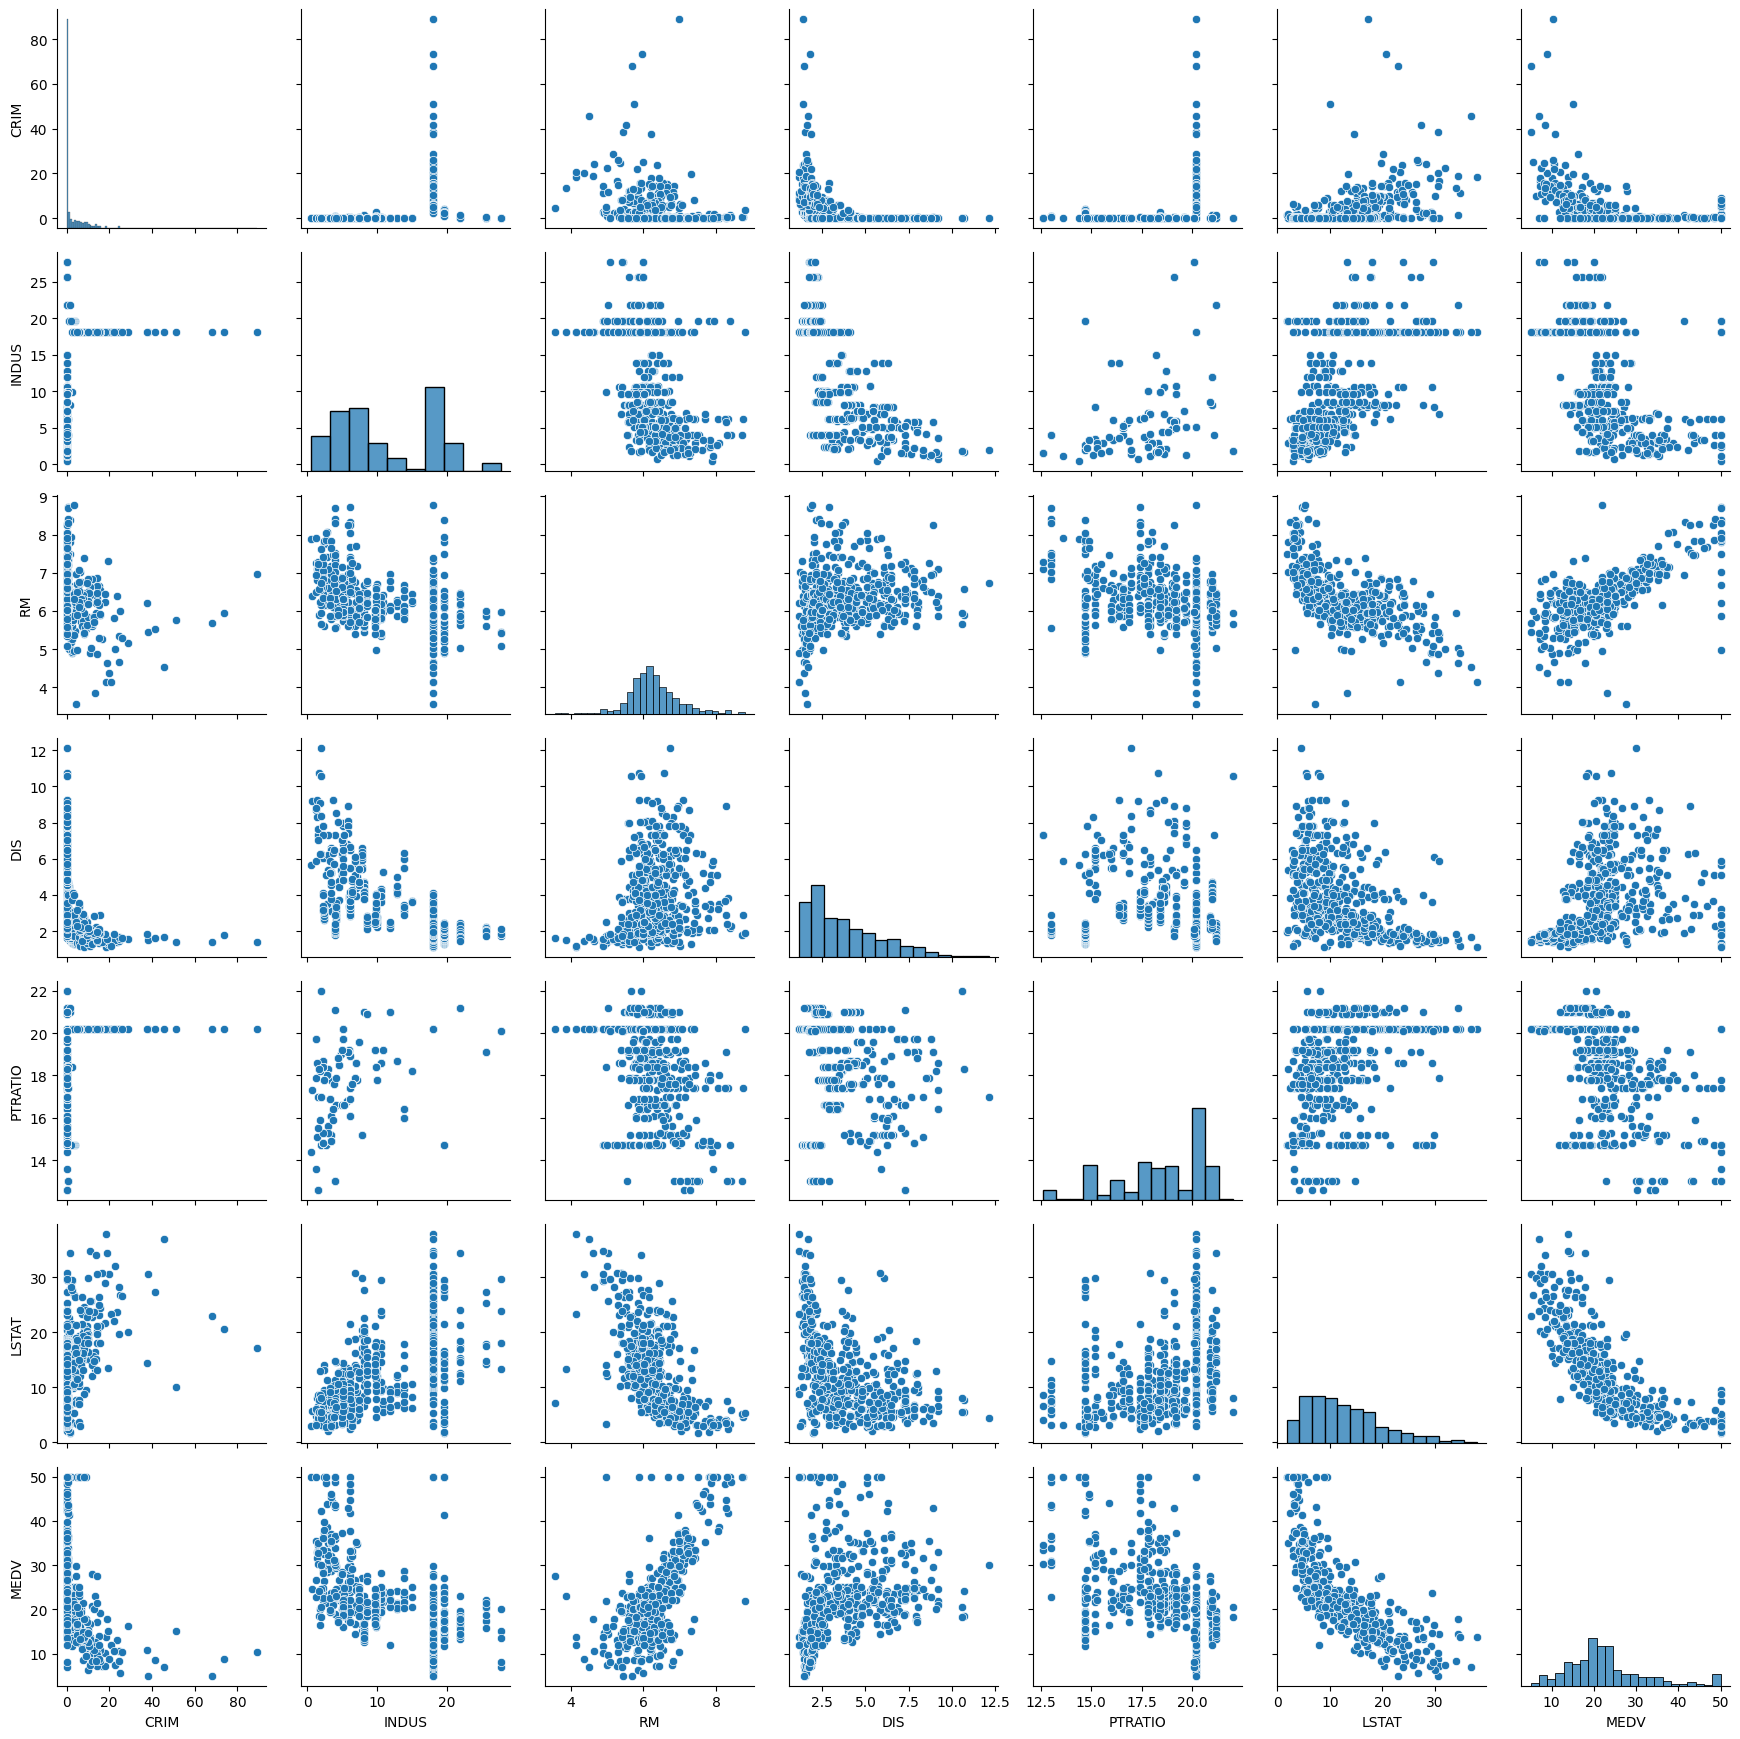

In [10]:
# View the initial features using Pair Plot
sns.pairplot(initialFeatures)
plt.tight_layout()
plt.show()

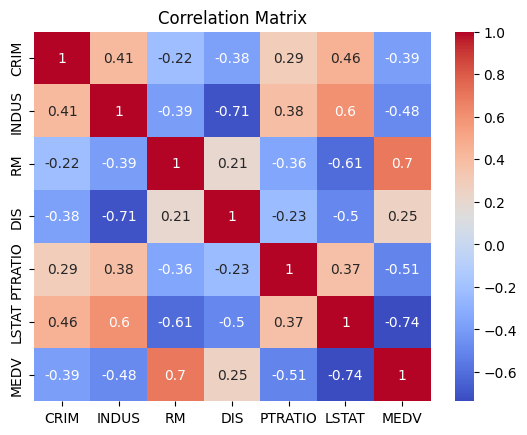

In [11]:
# Use Correlation Matrix for further analysis of the initial features
corrMatrix = initialFeatures.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

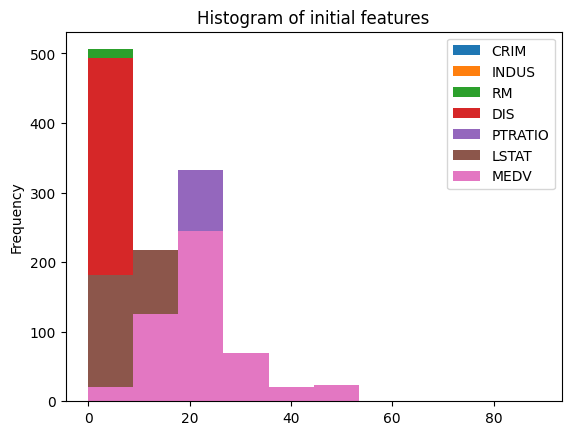

In [12]:
# Use Histogram to visualize the distribution of data
initialFeatures.plot.hist()
plt.title("Histogram of initial features")
plt.show()

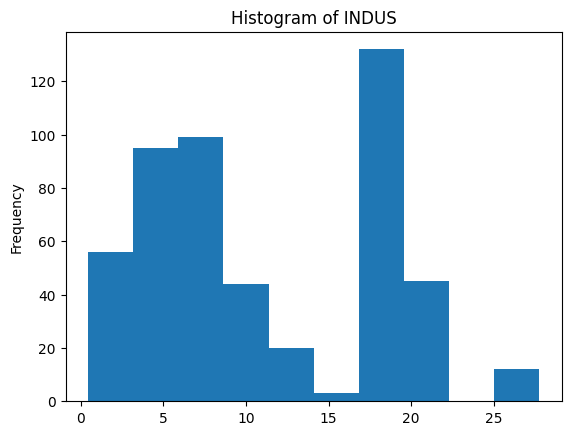

In [13]:
# View INDUS using Histogram
initialFeatures['INDUS'].plot.hist()
plt.title("Histogram of INDUS")
plt.show()

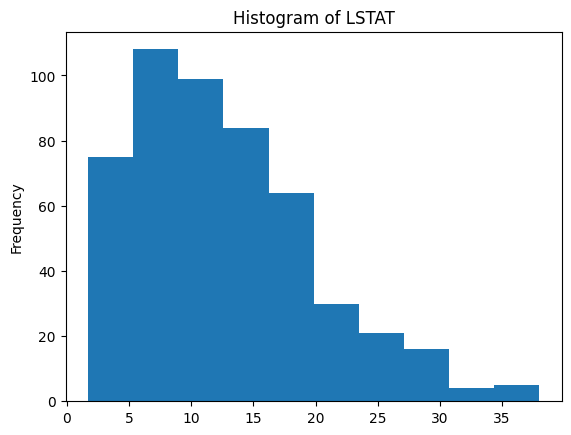

In [14]:
# View LSTAT using Histogram
initialFeatures['LSTAT'].plot.hist()
plt.title("Histogram of LSTAT")
plt.show()

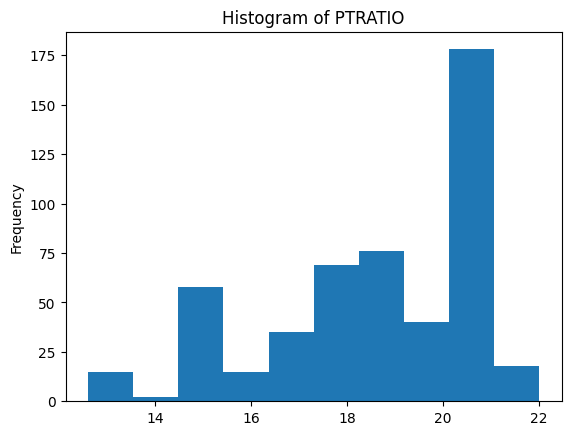

In [15]:
# View PTRATIO using Histogram
initialFeatures['PTRATIO'].plot.hist()
plt.title("Histogram of PTRATIO")
plt.show()

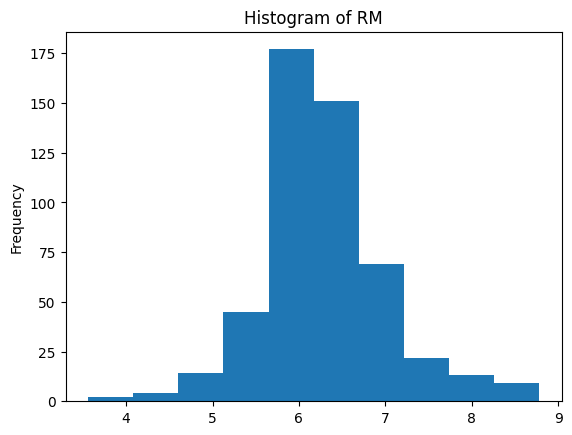

In [16]:
# View RM using Histogram
initialFeatures['RM'].plot.hist()
plt.title("Histogram of RM")
plt.show()

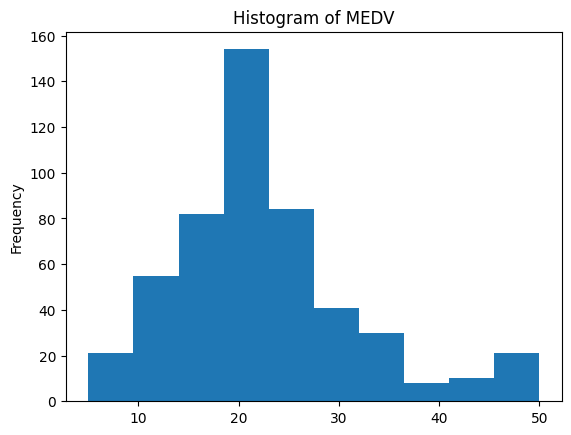

In [17]:
# View MEDV using Histogram
initialFeatures['MEDV'].plot.hist()
plt.title("Histogram of MEDV")
plt.show()

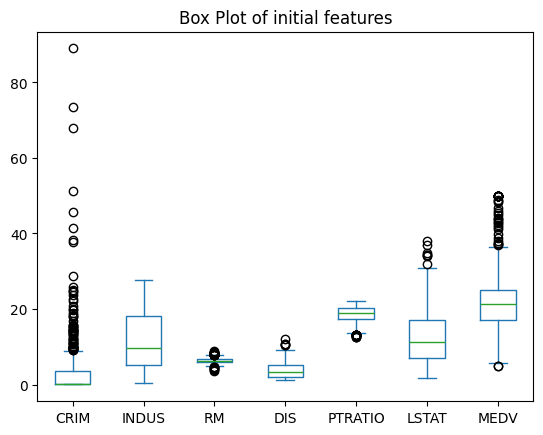

In [18]:
# Use Box Plot to visualize the median, quartiles, and outliers
initialFeatures.plot.box()
plt.title("Box Plot of initial features")
plt.tight_layout
plt.show()

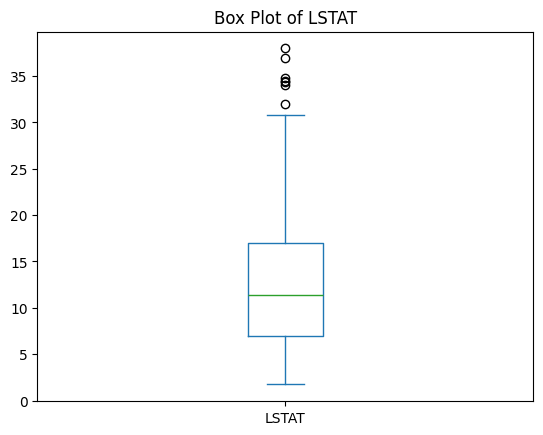

In [19]:
# View LSTAT using Box Plot
initialFeatures['LSTAT'].plot.box()
plt.title("Box Plot of LSTAT")
plt.show()

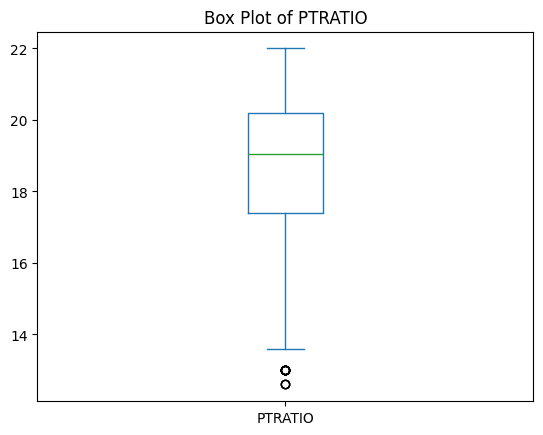

In [20]:
# View PTRATIO using Box Plot
initialFeatures['PTRATIO'].plot.box()
plt.title("Box Plot of PTRATIO")
plt.show()

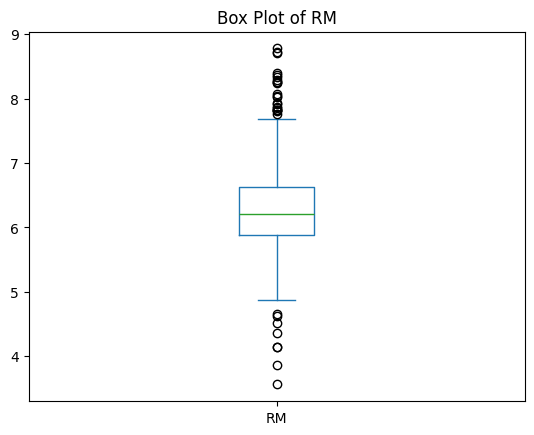

In [21]:
# View RM using Box Plot
initialFeatures['RM'].plot.box()
plt.title("Box Plot of RM")
plt.show()

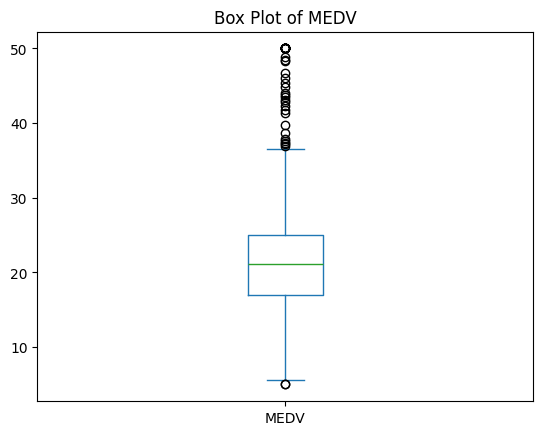

In [ ]:
# View MEDV using Box Plot
initialFeatures['MEDV'].plot.box()
plt.title("Box Plot of MEDV")
plt.show()

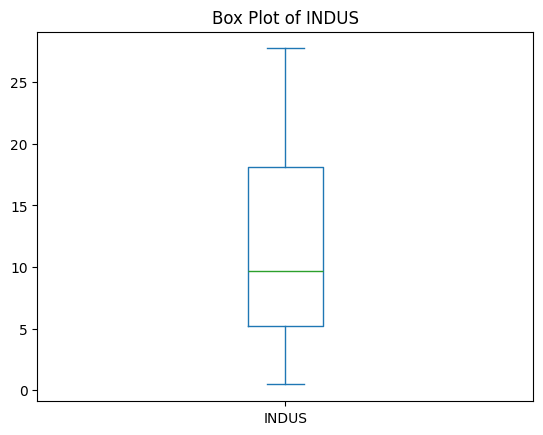

In [41]:
# View INDUS using Box Plot
initialFeatures['INDUS'].plot.box()
plt.title("Box Plot of INDUS")
plt.show()

In [23]:
# Analyze the other features to check for any correlation
otherFeatures = data[['ZN', 'CHAS', 'NOX', 'AGE', 'TAX','B','MEDV']]

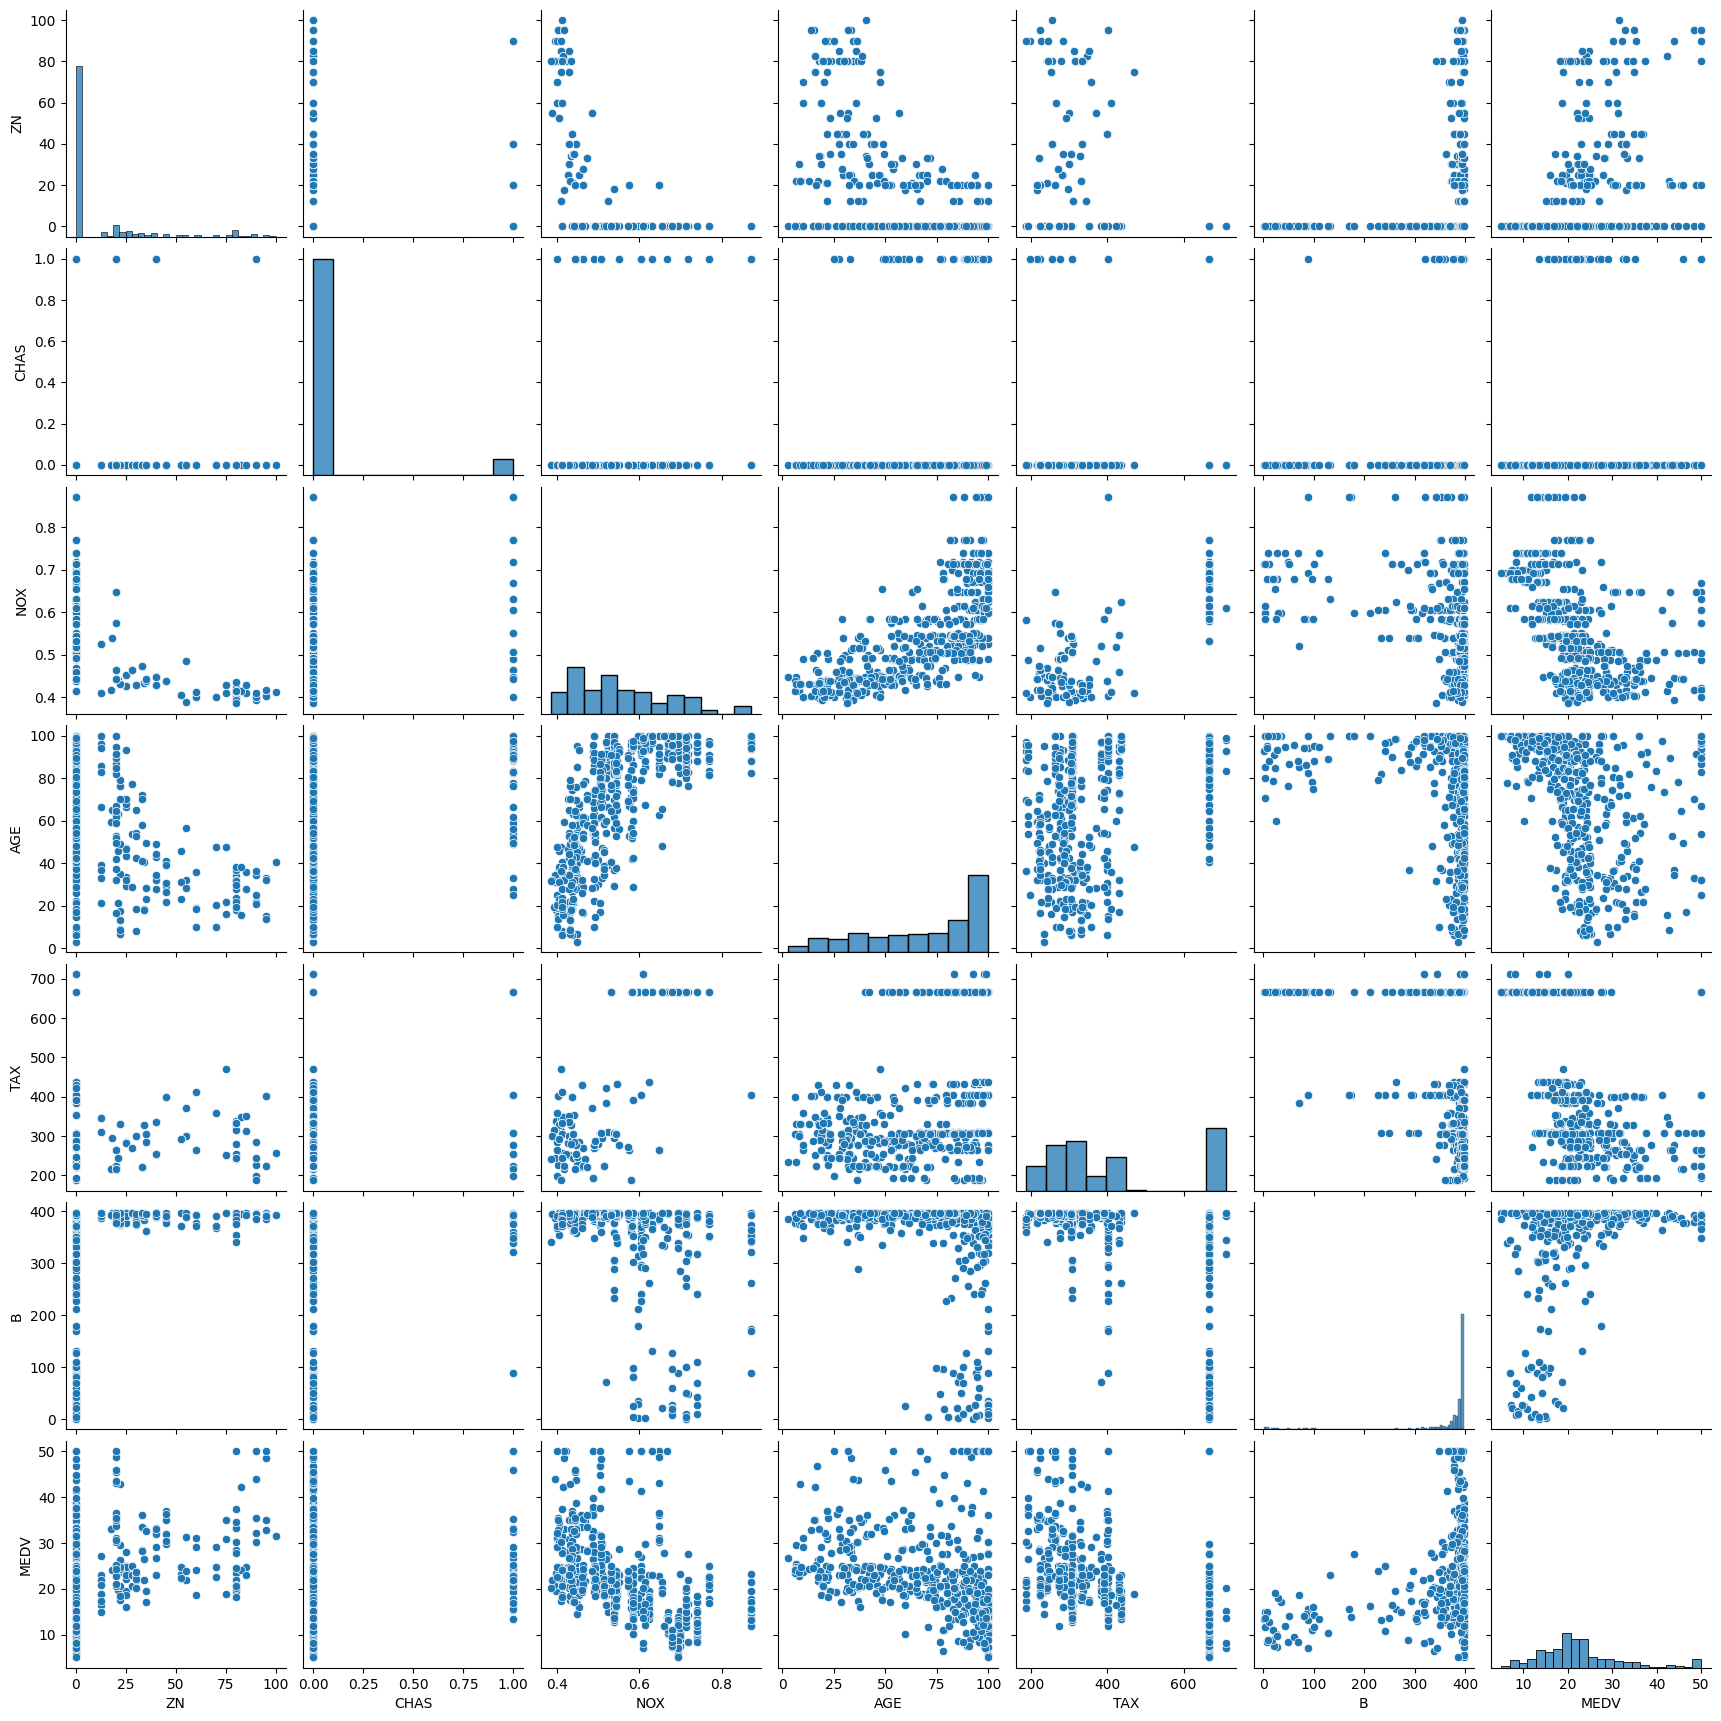

In [24]:
# View the other features using Pair Plot
sns.pairplot(otherFeatures)
plt.show()

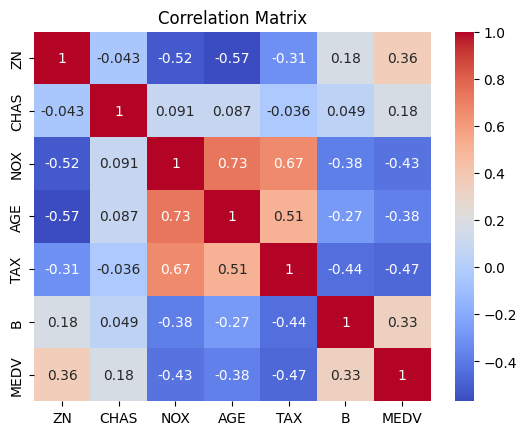

In [25]:
# Use Heatmap for Correlation Matrix of other features
corrMatrix = otherFeatures.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

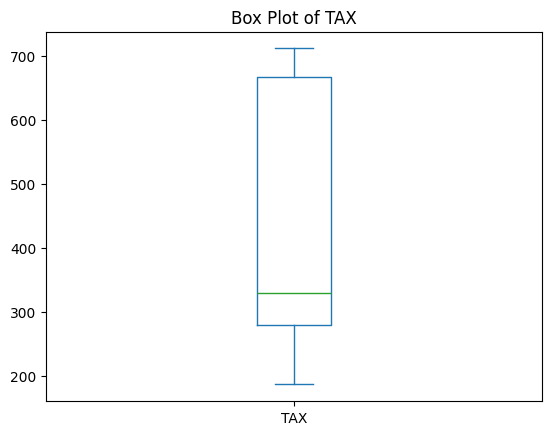

In [26]:
# View TAX using Box Plot
otherFeatures['TAX'].plot.box()
plt.title("Box Plot of TAX")
plt.show()

In [27]:
# Perform Data Preprocessing
# Check the data for null values
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [28]:
# Check the data for duplicates
print(data[data.duplicated()].sum())

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


In [29]:
# View the type of data of each attribute (checking for inconsistent data type)
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [30]:
# Feature Selection based from EDA
# Splitting the data into training and testing ets
X = data[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Handle outliers in training set using Winsorization
X_train_winsorized = X_train.apply(winsorize, limits=[0.01, 0.01])

In [32]:
# Implement Feature Scaling
scaler = StandardScaler()
X_train_winsorized[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']] = scaler.fit_transform(X_train_winsorized[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']])
X_test[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']] = scaler.transform(X_test[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']])

Mean Squared Error (MSE) on linear regression testing set: 28.83061818790307
Mean Squared Error (MSE) on linear regression training set: 25.869030866332416
R-squared (R2) on linear regression: 0.6068576180656966
Root Mean Squared Error (RMSE) on linear Regression: 5.369415069437552


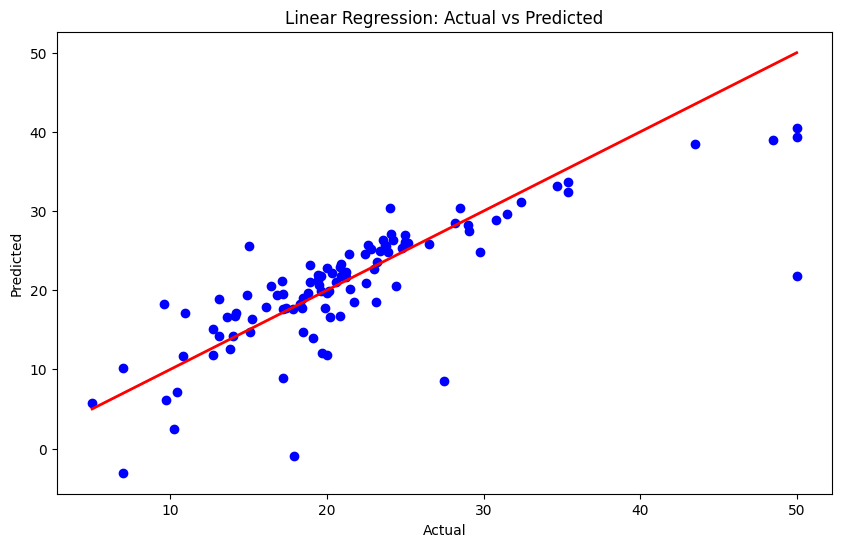

In [33]:
# Implement Linear Regression
# Train the model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_winsorized, y_train)

# Predict the testing and training set to determine overfitting
y_pred_lr = linear_regression_model.predict(X_test)
x_pred_lr = linear_regression_model.predict(X_train_winsorized)

# Implement the evaluation metrics
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
mse_lr_train = mean_squared_error(y_train, x_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on linear regression testing set: {mse_lr_test}")
print(f"Mean Squared Error (MSE) on linear regression training set: {mse_lr_train}")
print(f"R-squared (R2) on linear regression: {r2_lr}")
print(f"Root Mean Squared Error (RMSE) on linear Regression: {rmse_lr}")

# Visualize the predicted values using Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Best Ridge Regression Alpha: 100
Best Mean Squared Error (MSE) on ridge regression testing set: 26.966059002403597
Best Mean Squared Error (MSE) on ridge regression training set: 25.86903086655789
Best R-squared (R2) on ridge regression: 0.6322832691796336
Best Root Mean Squared Error (RMSE) on ridge Regression: 5.1928854216517815


<function matplotlib.pyplot.show(close=None, block=None)>

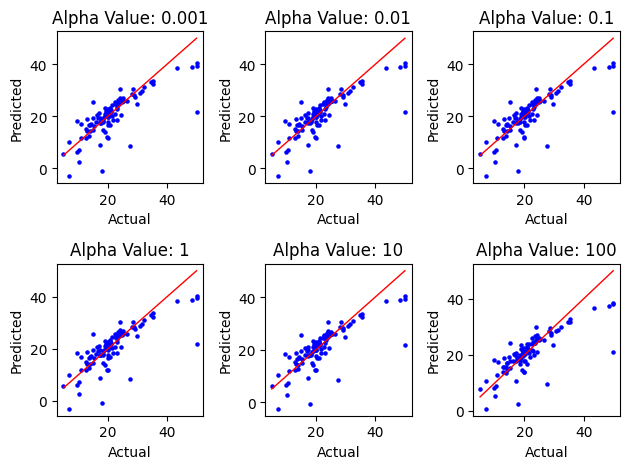

In [34]:
# Implement Ridge Regression
# Initialize the necessary variables
rr_alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_mse_rr_test = float('inf')
best_mse_rr_train = float('inf')
best_r2_rr = float()
best_rmse_rr = float('inf')
best_rr_alpha = None
num_plots = 0

# Use for-loop to find the best alpha value
for alpha in rr_alpha_values:

    # Train the model 
    ridge_regression_model = Ridge(alpha=alpha)
    ridge_regression_model.fit(X_train_winsorized, y_train)

    # Predict the testing and training set to determine overfitting
    y_pred_rr = ridge_regression_model.predict(X_test)
    x_pred_rr = ridge_regression_model.predict(X_train_winsorized)

    # Implement the evaluation metrics
    mse_rr_test = mean_squared_error(y_test, y_pred_rr)
    mse_rr_train = mean_squared_error(y_train, x_pred_rr)
    r2_rr = r2_score(y_test, y_pred_rr)
    rmse_rr = root_mean_squared_error(y_test, y_pred_rr)

    # Visualize the predicted values in each iteration using Scatter Plot
    if num_plots <= 6:
        num_plots = num_plots+1
        plt.subplot(2,3,num_plots)
        plt.scatter(y_test, y_pred_rr, 5,color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
        plt.title(f"Alpha Value: {alpha}")
        plt.xlabel('Actual')
        plt.ylabel('Predicted')

    # Get the best MSE value in the predicted testing set     
    if mse_rr_test < best_mse_rr_test:
        best_mse_rr_test = mse_rr_test
        best_rr_alpha = alpha

    # Get the best MSE value in the predicted training set
    if mse_rr_train < best_mse_rr_train:
        best_mse_rr_train = mse_rr_train

    # Get the best R-Squared and RMSE value
    if r2_rr > best_r2_rr:
        best_r2_rr = r2_rr
    if rmse_rr < best_rmse_rr:
        best_rmse_rr = rmse_rr
        
# Print the evaluation metrics
print(f"Best Ridge Regression Alpha:", best_rr_alpha)
print(f"Best Mean Squared Error (MSE) on ridge regression testing set: {best_mse_rr_test}")
print(f"Best Mean Squared Error (MSE) on ridge regression training set: {best_mse_rr_train}")
print(f"Best R-squared (R2) on ridge regression: {best_r2_rr}")
print(f"Best Root Mean Squared Error (RMSE) on ridge Regression: {best_rmse_rr}")

plt.tight_layout()
plt.show

Best Lasso Regression Alpha: 1
Best Mean Squared Error (MSE) on lasso regression testing set: 27.517127497870945
Best Mean Squared Error (MSE) on lasso regression training set: 25.869040767921682
Best R-squared (R2) on lasso regression: 0.6247687448810222
Best Root Mean Squared Error (RMSE) on lasso Regression: 5.24567702950448


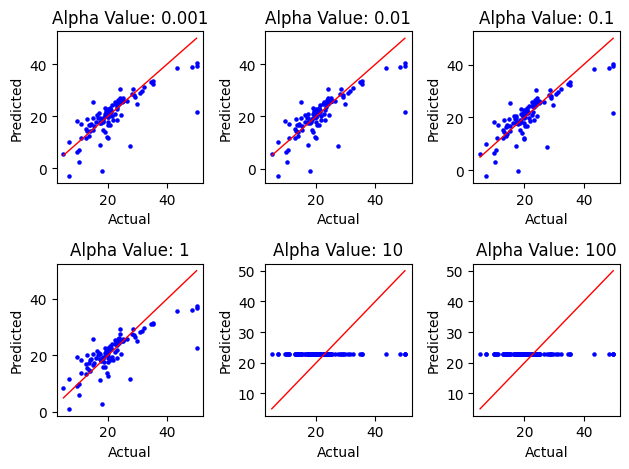

In [35]:
# Implement Lasso Regression
# Initialize the necessary variables
la_alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_mse_la_test = float('inf')
best_mse_la_train = float('inf')
best_r2_la = float()
best_rmse_la = float('inf')
best_la_alpha = None
num_plots = 0

# Use for-loop to find the best alpha value
for alpha in la_alpha_values:

    # Train the model 
    lasso_regression_model = Lasso(alpha=alpha)
    lasso_regression_model.fit(X_train_winsorized, y_train)

    # Predict the testing and training set to determine overfitting
    y_pred_la = lasso_regression_model.predict(X_test)
    x_pred_la = lasso_regression_model.predict(X_train_winsorized)

    # Implement the evaluation metrics
    mse_la_test = mean_squared_error(y_test, y_pred_la)
    mse_la_train = mean_squared_error(y_train, x_pred_la)
    r2_la = r2_score(y_test, y_pred_la)
    rmse_la = root_mean_squared_error(y_test, y_pred_la)

    # Visualize the predicted values in each iteration using Scatter Plot
    if num_plots <= 6:
        num_plots = num_plots+1
        plt.subplot(2,3,num_plots)
        plt.scatter(y_test, y_pred_la, 5,color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
        plt.title(f"Alpha Value: {alpha}")
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        
    # Get the best MSE value in the predicted testing set 
    if mse_la_test < best_mse_la_test:
        best_mse_la_test = mse_la_test
        best_la_alpha = alpha

    # Get the best MSE value in the predicted training set
    if mse_la_train < best_mse_la_train:
        best_mse_la_train = mse_la_train

    # Get the best R-Squared and RMSE value
    if r2_la > best_r2_la:
        best_r2_la = r2_la
    if rmse_la < best_rmse_la:
        best_rmse_la = rmse_la

# Print the evaluation metrics
print(f"Best Lasso Regression Alpha:", best_la_alpha)
print(f"Best Mean Squared Error (MSE) on lasso regression testing set: {best_mse_la_test}")
print(f"Best Mean Squared Error (MSE) on lasso regression training set: {best_mse_la_train}")
print(f"Best R-squared (R2) on lasso regression: {best_r2_la}")
print(f"Best Root Mean Squared Error (RMSE) on lasso Regression: {best_rmse_la}")

plt.tight_layout()
plt.show()

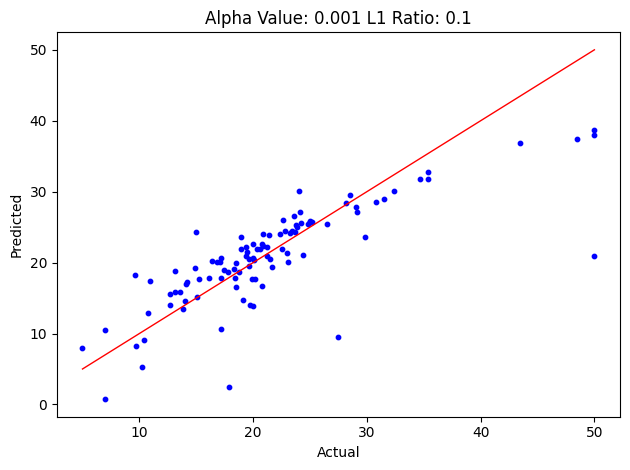

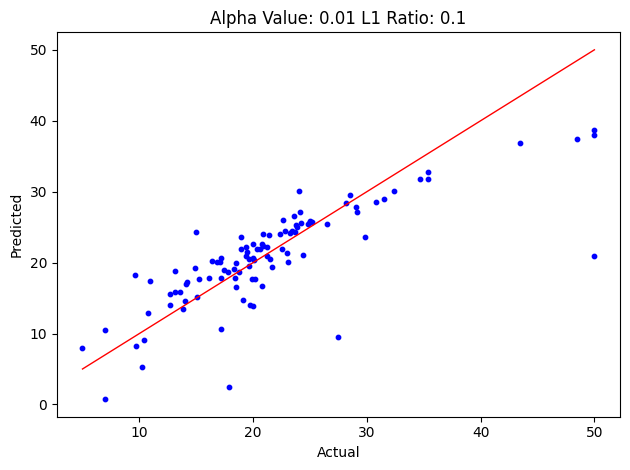

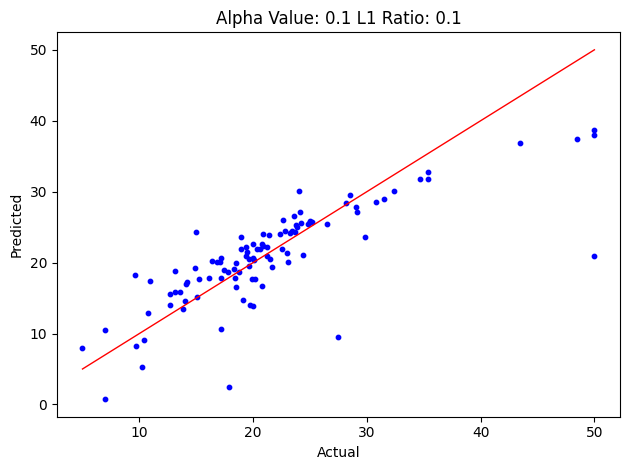

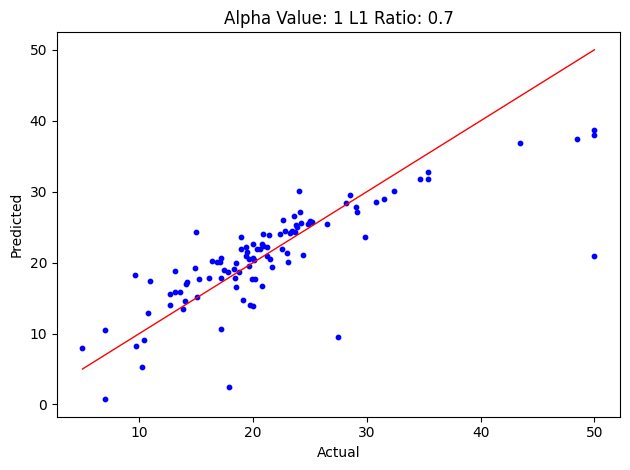

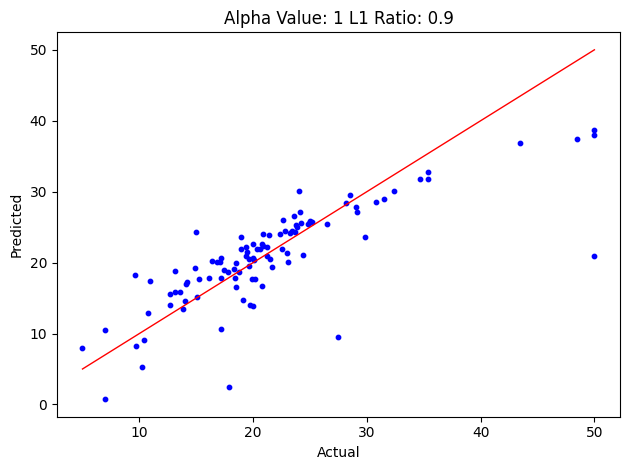

Best Elastic Net Alpha: 1
Best Elastic Net L1 Ratio: 0.9
Best Mean Squared Error (MSE) on elastic net testing set: 27.453997881209208
Best Mean Squared Error (MSE) on elastic net training set: 25.86904206687975
Best R-squared (R2) on elastic net: 0.625629598009569
Best Root Mean Squared Error (RMSE) on elastic net: 5.239656275101375


In [36]:
# Implement Elastic Net
# Initialize the necessary variables
en_alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratio_values = [0.1,0.3,0.5,0.7,0.9]
best_mse_en_test = float('inf')
best_mse_en_train = float('inf')
best_r2_en = float()
best_rmse_en = float('inf')
best_en_alpha = None
best_l1_ratio = None
num_plots = 0

# Use nested for-loops to find the best alpha and l1 ratio values
for alpha in en_alpha_values:
    for l1_ratio in l1_ratio_values:
        
        # Train the model 
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net_model.fit(X_train_winsorized, y_train)

        # Predict the testing and training set to determine overfitting
        y_pred_en = elastic_net_model.predict(X_test)
        x_pred_en = elastic_net_model.predict(X_train_winsorized)

        # Implement the evaluation metrics
        mse_en_test = mean_squared_error(y_test, y_pred_en)
        mse_en_train = mean_squared_error(y_train, x_pred_en)
        r2_en = r2_score(y_test, y_pred_en)
        rmse_en = root_mean_squared_error(y_test, y_pred_en)

        # Get the best MSE value and visualize using Scatter Plot
        if mse_en_test < best_mse_en_test:
            best_mse_en_test = mse_en_test
            best_en_alpha = alpha
            best_l1_ratio = l1_ratio
            
            plt.scatter(y_test, y_pred_rr,10,color='blue')
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
            plt.title(f"Alpha Value: {alpha} L1 Ratio: {l1_ratio}")
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.tight_layout()
            plt.show()

        # Get the best MSE value in the predicted trained set
        if mse_en_train < best_mse_en_train:
            best_mse_en_train = mse_en_train

        # Get the best R-Squared and RMSE value
        if r2_en > best_r2_en:
            best_r2_en = r2_en
        if rmse_en < best_rmse_en:
            best_rmse_en = rmse_en

# Print the evaluation metrics
print(f"Best Elastic Net Alpha:", best_en_alpha)
print(f"Best Elastic Net L1 Ratio:", best_l1_ratio)
print(f"Best Mean Squared Error (MSE) on elastic net testing set: {best_mse_en_test}")
print(f"Best Mean Squared Error (MSE) on elastic net training set: {best_mse_en_train}")
print(f"Best R-squared (R2) on elastic net: {best_r2_en}")
print(f"Best Root Mean Squared Error (RMSE) on elastic net: {best_rmse_en}")



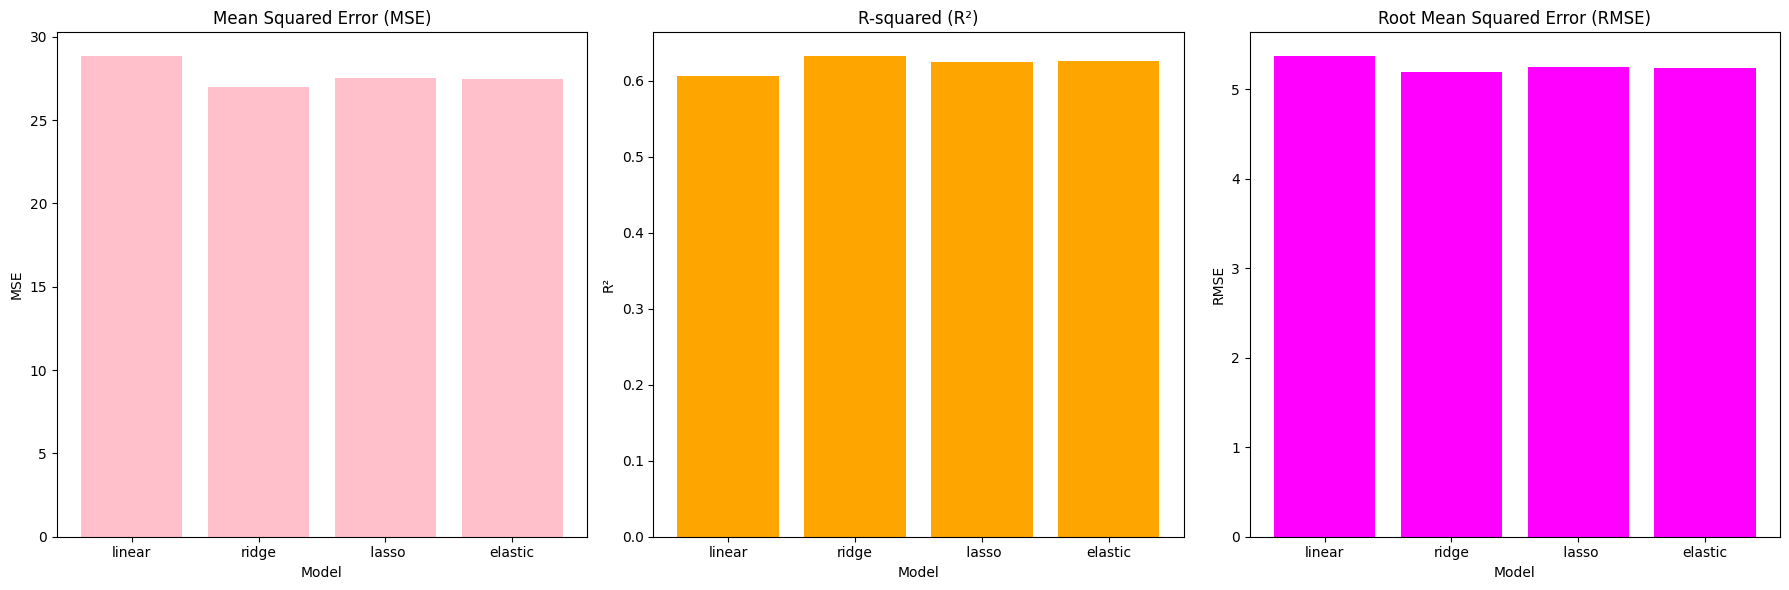

In [37]:
# Prepare the evaluation metrics for visualization
model_label = ['linear', 'ridge', ' lasso', 'elastic']
mse_values = [mse_lr_test, best_mse_rr_test, best_mse_la_test, best_mse_en_test]
r2_values = [r2_lr, best_r2_rr, best_r2_la, best_r2_en]
rmse_values = [rmse_lr, best_rmse_rr, best_rmse_la, best_rmse_en]

# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Mean Squared Error (MSE)
axes[0].bar(model_label,mse_values, color='pink')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# Plotting R-squared (R²)
axes[1].bar(model_label, r2_values, color='orange')
axes[1].set_title('R-squared (R²)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R²')

# Plotting Root Mean Squared Error (RMSE)
axes[2].bar(model_label, rmse_values, color='magenta')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

In [38]:
# Redo the model implementation with the best tuned hyperparameters
# Initialize the selected features and the target variable
X = data[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = data['MEDV']

# Split the data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Winsorized the training set
X_train_winsorized = X_train.apply(winsorize, limits=[0.01, 0.01])

# Implement Feature Scaling
scaler = StandardScaler()
X_train_winsorized[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']] = scaler.fit_transform(X_train_winsorized[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']])
X_test[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']] = scaler.transform(X_test[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']])

# Train Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_winsorized, y_train)

# Train Ridge Regression model with the best alpha value of 100
ridge_regression_model = Ridge(alpha=100)
ridge_regression_model.fit(X_train_winsorized, y_train)

# Train Lasso Regression model with the best alpha value of 1
lasso_regression_model = Lasso(alpha=1)
lasso_regression_model.fit(X_train_winsorized, y_train)

# Train Elastic Net model with the best alpha value of 1 and l1 ratio of 0.9
elastic_net_model = ElasticNet(alpha=1, l1_ratio=0.9)
elastic_net_model.fit(X_train_winsorized, y_train)

ElasticNet(alpha=1, l1_ratio=0.9)

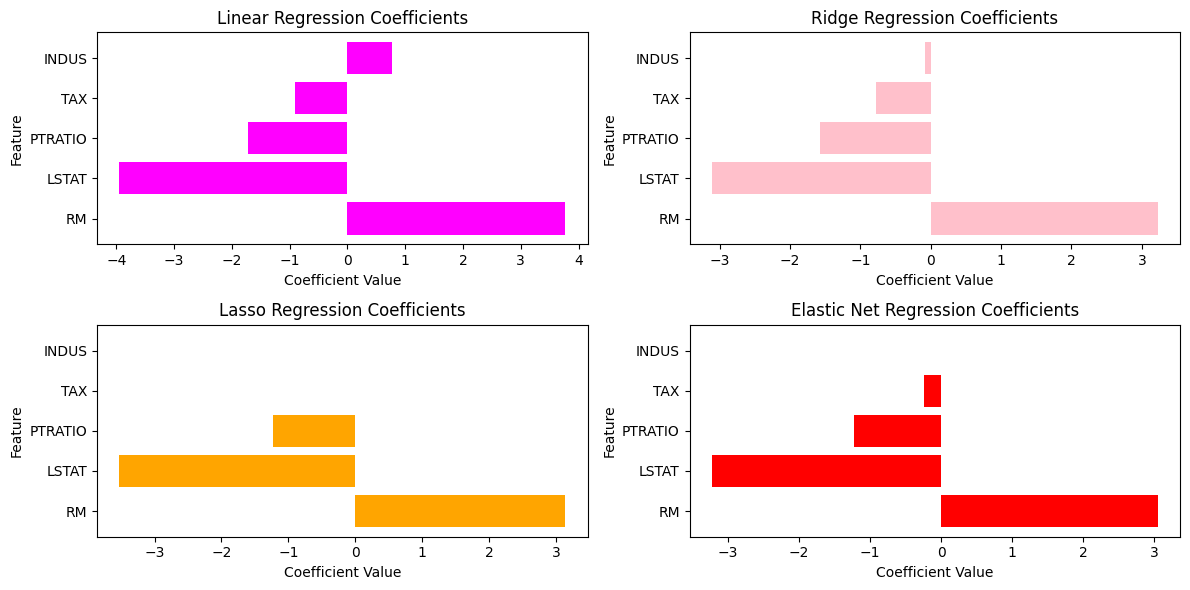

In [39]:
# Extracting coefficients from the Linear Regression model
linear_coefficients = pd.DataFrame({'Feature': X_train_winsorized.columns,'Coefficient': linear_regression_model.coef_})

# Extracting coefficients from the Ridge Regression model
ridge_coefficients = pd.DataFrame({'Feature': X_train_winsorized.columns,'Coefficient': ridge_regression_model.coef_})

# Extracting coefficients from the Lasso Regression model
lasso_coefficients = pd.DataFrame({'Feature': X_train_winsorized.columns,'Coefficient': lasso_regression_model.coef_})

# Extracting coefficients from the Elastic Net Regression model
elastic_net_coefficients = pd.DataFrame({'Feature': X_train_winsorized.columns,'Coefficient': elastic_net_model.coef_})

# Plotting the coefficients for comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Linear Regression Coefficients
axes[0, 0].barh(linear_coefficients['Feature'], linear_coefficients['Coefficient'], color='magenta')
axes[0, 0].set_title('Linear Regression Coefficients')
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_ylabel('Feature')

# Ridge Regression Coefficients
axes[0, 1].barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'], color='pink')
axes[0, 1].set_title('Ridge Regression Coefficients')
axes[0, 1].set_xlabel('Coefficient Value')
axes[0, 1].set_ylabel('Feature')

# Lasso Regression Coefficients
axes[1, 0].barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'], color='orange')
axes[1, 0].set_title('Lasso Regression Coefficients')
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_ylabel('Feature')

# Elastic Net Regression Coefficients
axes[1, 1].barh(elastic_net_coefficients['Feature'], elastic_net_coefficients['Coefficient'], color='red')
axes[1, 1].set_title('Elastic Net Regression Coefficients')
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_ylabel('Feature')

plt.tight_layout()
plt.show()